# Modelos Bi-estáveis
## O modelo de Hodgkin-Huxley

In [1]:
%display typeset

<p>A transmiss&atilde;o de informa&ccedil;&otilde;es no sistema nervorsos dos animais se d&aacute; atrav&eacute;s de picos de potencial el&eacute;trico que se propagam ao longo da membrana de c&eacute;lulas especiais denominadas Neur&ocirc;nios. Estes potenciais el&eacute;tricos, por sua vez, s&atilde;o chamados de potenciais de a&ccedil;&atilde;o. Em um dos trabalhos mais c&eacute;lebres da biomatem&aacute;tica do s&eacute;culo XX, Hodgkin e Huxley, nos anos 50, propuseram a partir de experimentos revolucion&aacute;rios, um modelo matem&aacute;tico para a transmiss&atilde;o de impulsos el&eacute;tricos em neur&ocirc;nios.</p>
<p><img src="http://upload.wikimedia.org/wikipedia/commons/9/95/Action_Potential.gif" alt="Potencial de a&ccedil;&atilde;o" width="320" height="200" /></p>
<p>&nbsp;</p>
<p>O Potencial de a&ccedil;&atilde;o &eacute; o resultados de uma orquestra&ccedil;&atilde;o delicada de canais i&ocirc;nicos na membrana do neur&ocirc;nio provocando correntes s&uacute;bitas que se propagam como ondas.</p>
<p><img src="http://upload.wikimedia.org/wikipedia/commons/c/cc/Action_potential_vert.png" alt="Potencial de A&ccedil;&atilde;o" width="320" height="320" /></p>
<p>&nbsp;</p>
<p>O Modelo de Hodgkin e Huxley foi pioneiro em caracterizar este circuito el&eacute;trico celular:</p>
<p><img src="http://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/MembraneCircuit.svg/500px-MembraneCircuit.svg.png" alt="circuito el&eacute;trico" width="500" height="321" /></p>
<p>A representa&ccedil;&atilde;o esquem&aacute;tica acima &eacute; equivalemte ao modelomatem&aacute;tico abaixo. A bi-camada lip&iacute;dica, &eacute; representada como uma capacit&acirc;ncia ($C_m$). Canais i&ocirc;nicos acionados por voltagem e canais de "vazamento" i&ocirc;nico, s&atilde;o representados pelas condut&acirc;ncias $g_n$ (n&atilde;o-linear) e $g_l$ (linear), respectivamente. Os gradientes eletroqu&iacute;micos que determinam o fluxo dos &iacute;ons s&atilde;o representados por baterias ($E$).<span>&nbsp;</span></p>
<p>&nbsp;</p>
<p>$$I = C_m\frac{{\mathrm d} V_m}{{\mathrm d} t} + \bar{g}_Kn^4(V_m - V_K) + \bar{g}_{Na}m^3h(V_m - V_{Na}) + \bar{g}_l(V_m - V_l),$$</p>
<p>$$\frac{dn}{dt} = \alpha_n(1 - n) - \beta_n n$$</p>
<p>$$\frac{dm}{dt} = \alpha_m(1 - m) - \beta_m m$$</p>
<p>$$\frac{dh}{dt} = \alpha_h(1 - h) - \beta_h h$$</p>
<p>$n,m,h$ s&atilde;o vari&aacute;veis adimensionais, associadas com a ativa&ccedil;&atilde;o dos canais de s&oacute;dio, ativa&ccedil;&atilde;o dos canais de pot&aacute;ssio e a inativa&ccedil;&atilde;o dos canais de pot&aacute;ssio, respectivamente. Os alfas e betas s&atilde;o taxas associadas com a velocidade dos canais i&ocirc;nicos e s&atilde;oafetados pela temperatura.</p>

Vamos implementar o [Modelo de Hodgkin e Huxley](https://en.wikipedia.org/wiki/Quantitative_models_of_the_action_potential#Hodgkin%E2%80%93Huxley_model) e examinar a sua dinâmica.

In [2]:
def fun(t,y, p):
    V,n,m,h = y
    VNa = 50
    VK = -77
    VL = -54.4
    gNa = 120
    gK = 36
    gL = .3
    C = 1
    I = p[0]
    an = .01*(V+55)/(1-exp(-(V+55)/10))
    bn = .125*exp(-(V+65)/80)
    am = .1*(V+40)/(1-exp(-(V+40)/10))
    bm = 4*exp(-(V+65)/18)
    ah = .07*exp(-(V+65)/20)
    bh = 1/(1+exp(-(V+35)/10))
    return [
    (I - gNa*h*(V-VNa)*m^3 - gK*(V-VK)*n^4 - gL*(V-VL))/C,
    an*(1-n) - bn*n,
    am*(1-m) - bm*m,
    ah*(1-h) - bh*h
    ]

In [3]:
T = ode_solver()
T.algorithm = "rk8pd"
T.function = fun
t_range = [0,50]
y0 = [-65, .317, .052, .596]

In [6]:
T.ode_solve(t_range,y0,num_points=2000, params=[15])

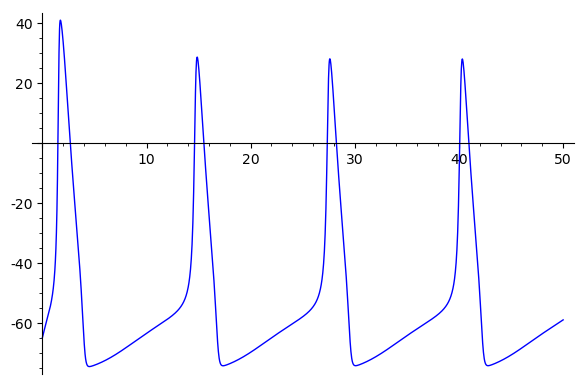

In [7]:
T.plot_solution(i=0,interpolate=True)

In [10]:
@interact
def integra(I=(0,100,10)):
    T.ode_solve(t_range,y0,num_points=500, params=[I])
    T.plot_solution(i=0,interpolate=True)

Interactive function <function integra at 0x7efdede858c8> with 1 widget
  I: IntSlider(value=50, description='…